

# Parkinson’s Disease

Para poder describir el problema asignado, debemos de hacer una breve introducción sobre la enfermedad de **Parkinson**, siendo un tipo de trastorno del movimiento. Esto suele ocurrir cuando las células nerviosas no producen suficiente cantidad de dopamina en el cerebro (esta es una sustancia fundamental para el cerebro). Una de las principales características para saber si el paciente padece de Parkinson es en el habla. Ésta cambia cuando apenas está comenzando, esto es importante porque en el dataset asignado se grabaron 195 voces por cada individuo, además, usa un conjunto de datos que se compone de una gama de **mediciones biomédicas** de la voz de 31 personas, en el cuál 23 tienen la enfermedad de Parkinson. 
Cabe recalcar que nuestro problema es de tipo **clasificación** porque debemos de decir si un paciente padece de la enfermedad de Parkinson o está sano, por lo tanto, debemos de obtener una buena precisión.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

import pandas as pd
import seaborn as sns

from sklearn.model_selection import GridSearchCV


# Lectura del dataset
En la primera línea vamos a crear una variable que va a obtener el conjunto de datos del dataset utilizado, para esto, invocaremos una función del módulo de pandas **read_csv** y le pasamos la ruta del archivo en formato csv.
En la segunda línea imprimimos nuestro conjunto de información.
Daremos una breve información de cada columna.

* **MDVP:Fo(Hz)** = Es la frecuencia fundamental vocal promedio.
* **MDVP:Fhi(Hz)** = Es la máxima frecuencia vocal fundamental.
* **MDVP:Flo(Hz)** = Es la mínima frecuencia vocal fundamental.
* **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** = Son las diversas medidas de variación de la frecuencia fundamental.
* **MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** = Son las diversas medidas de variación de la amplitud.
* **NHR, HNR** = Estas son dos medidas de la relación entre el ruido y los componentes tonales de la voz.
* **status (variable a predecir)** = El estado de salud del sujeto. 
  -   1: El sujeto tiene la enfermedad de Parkinson.
  -   0: El sujeto está sano.
* **RPDE, D2** = Son dos medidas de complejidad dinámica no lineal.
* **DFA** = Es la exponente de escala fractal de la señal.
* **spread1,spread2,PPE** = Son tres medidas no lineales de variación de la frecuencia fundamental.




In [ ]:
parkinson_ds = pd.read_csv("parkinsons.csv")
print(parkinson_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Eliminaremos la columna **name** porque no es relevante para nuestro estudio. Para esto, tenemos que tener en cuenta que nuestra variable **parkinson_ds** que contiene la información a estudiar es de tipo **DataFrame**, este tiene un método llamado **drop** que utilizaremos para eliminar la columna. 

In [ ]:
parkinson_ds = parkinson_ds.drop('name', axis=1)

Con el método describe vamos a obtener la información estadística de los datos de nuestro dataset. Acá podemos ver información como el número de muestra utilizados, la media, desviación estándar, el valor máximo y mínimo, mediana y los valores percentiles (25%, 50% y 75%).

In [ ]:
parkinson_ds.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Vamos a verificar si en nuestro conjunto de datos tenemos valores nulos, para esto, sumamos la cantidad de nulos que tiene cada uno de nuestras celdas.

In [ ]:
parkinson_ds.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Como no tenemos ningún valor nulo, no aplicaremos ninguna técnica para el prepocesamiento de datos, por lo tanto, vamos a pasar para el siguiente item.

# Inspeccionamiento de los datos
En esta parte vamos a ver:
* La distribución de la variable a predecir.
* La creación de una matriz de **Correlación** para inspeccionar posibles variables predictoras que están relacionadas entre sí.

Crearemos un gráfico tipo histograma gracias al módulo de matplotlib para ver la variable a predecir.

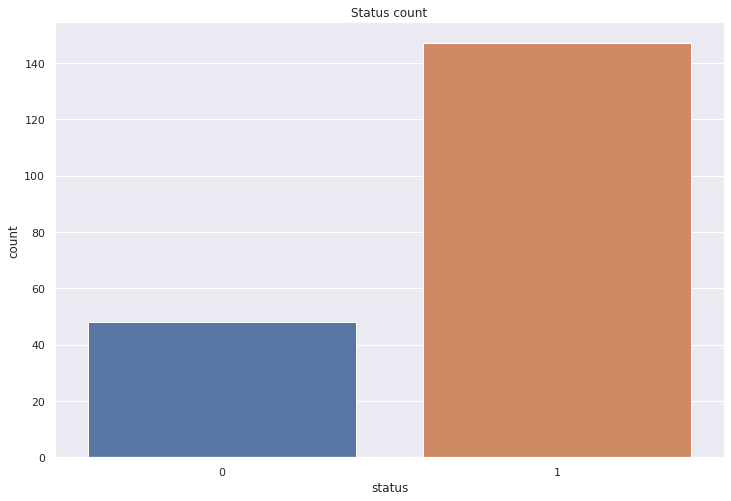

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x="status", data=parkinson_ds)
plt.title("Status count")
plt.show()

En el histograma vemos que hay un desbalanceo en nuestra variable a predecir, por lo tanto, necesitamos balancearlo, haremos uso de **RandomOverSampler** que hace parte del módulo **imblearn**, esta clase nos sirve para realizar un submuestro aleatorio que nos servirá para balancear nuestra variable a predecir.

**RandomOverSampler** tiene un parámetro llamado **sampling_strategy** y vamos a utilizar una estrategia llamada **minority**.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

undersample = RandomOverSampler(sampling_strategy='minority')
parkinson_ds, park_status = undersample.fit_resample(parkinson_ds, parkinson_ds["status"])

Comprobamos ahora los datos.

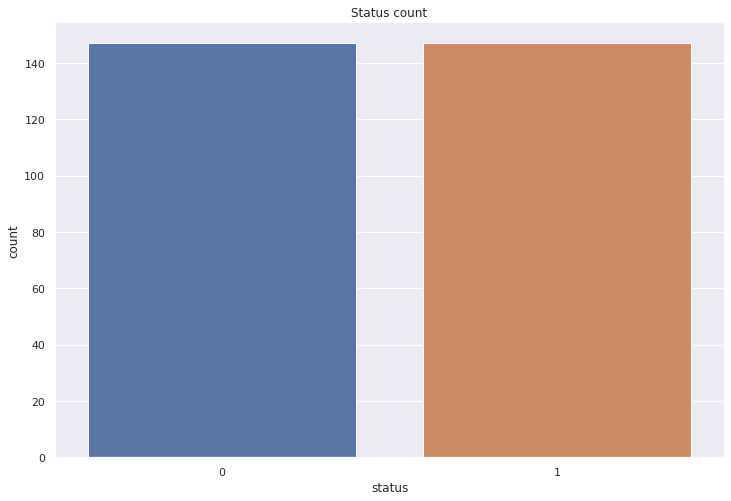

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x="status", data=parkinson_ds)
plt.title("Status count")
plt.show()

Primero creamos la matrix de correlación y redondeamos los decimales en 2 unidades, luego creamos el mapa de correlación.
Se observó que hay muchas variables que tienen una correlación del 0.99, esto es porque las variables que tienen esta correlación son las mismas pero en diferente unidad, un ejemplo claro es **MDVP:Jitter(%)** que tiene una correlación del *0.99* con **MDVP:Jitter(Abs)** porque son las mismas variables pero la diferencia es que utilizan una unidad diferente. En la definición de nuestras columnas están las variables en diferentes unidades.

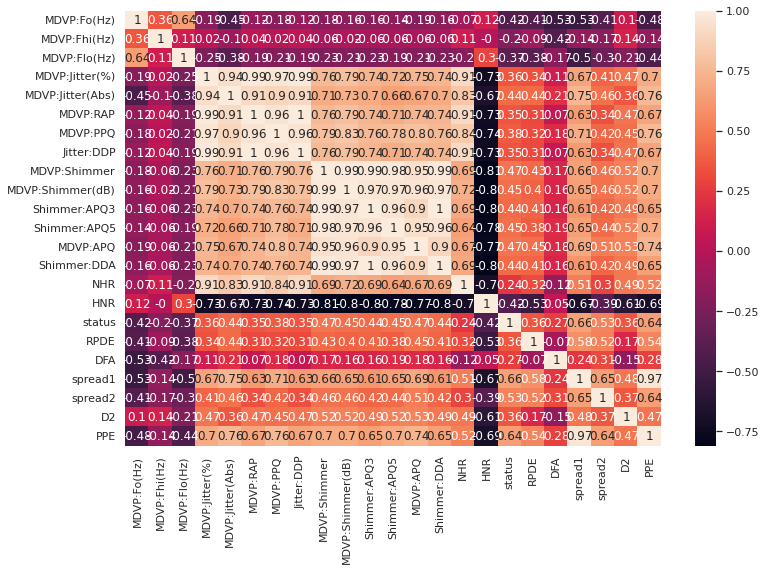

In [ ]:
correlation_matrix = parkinson_ds.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# Normalización de datos
Acá vamos a hacer uso de la clase **MinMaxScaler** qeue nos ayudará a normalizar los datos. Creamos dos variables, la primera obtendremos todos los valores de nuestro dataset pero excluyendo a la columna **status** y vamos a definir una variable **y** que va a obtener los valores de la columna **status**.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(parkinson_ds.loc[:, parkinson_ds.columns != 'status'].values[:, 1:])
y = parkinson_ds.loc[:, 'status'].values



#Modelo de entrenamiento

Usaremos el método **train_test_split** para crear un conjunto de datos para entrenar, de esta manera, obtenemos el conjunto **X**, de ahí vamos a sacar el 20% para entrenar. Como podemos ver, se asignarán 4 variables, de estas, **x_train**, **x_test**, **y_train** y **y_test**.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np # linear algebra

model_logistic = LogisticRegression(random_state=42)


Vamos a ajustar los parámetros del modelo **Logistic Regression** utilizando **GridSearch** que nos ayudará a obtener los parámetros más optimos para dicho modelo. 

Usaremos **hidden_layer_sizes** para crear las capas y las neuronas a utilizar, en nuestro caso, usaremos 4 parámetros, los dos primeros tienen dos capas y los restantes tienen solo una capa.

El parámetro **max_iter** sirve para poner la cantidad máxima de iteraciones.

El **alpha** es la tasa de aprendizaje.

In [ ]:
params_lg = [
    {
        'C' : [1e-3, 0.01, 0.1, 1, 10],  
        'penalty':["l2"],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    },

]

Aplicaremos el **GridSearchCV** y le ingresamos los parámetros anteriores, además, usaremos una validación cruzada de 5.

In [ ]:
grid_search = GridSearchCV(model_logistic, params_lg, cv=5,  scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='accuracy')

Miramos cuáles fueron los mejores parámetros.

In [ ]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

Crearemos una variable **Ytrain_predict** que usa un método para evaluar el modelo para el conjunto de entrenamiento. Accuracy tiene el valor o precisión del entrenamiento.

In [ ]:
Ytrain_predict = grid_search.predict(x_train)

accuracy = grid_search.score(x_train, y_train)

print(f"La precisión del modelo Logistic Regression sobre el conjunto de entrenamiento es: {accuracy:.2f}")

La precisión del modelo Logistic Regression sobre el conjunto de entrenamiento es: 0.82


Mostraremos la matriz de confusión del conjunto de entrenamiento.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cmatrix = confusion_matrix(y_train, Ytrain_predict)
print(cmatrix)
print(classification_report(y_train, Ytrain_predict))

[[97 20]
 [23 95]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       117
           1       0.83      0.81      0.82       118

    accuracy                           0.82       235
   macro avg       0.82      0.82      0.82       235
weighted avg       0.82      0.82      0.82       235



Ahora vamos a hacer lo mismo que hicimos para obtener la predición y la precisión de la evaluación en el conjunto de datos de entrenamiento pero esta vez serán para el conjunto de datos de prueba.

In [ ]:
Ytest_predict = grid_search.predict(x_test)

accuracy_test = grid_search.score(x_test, y_test)

print(f"La precisión del modelo Logistic Regression sobre el conjunto de prueba es: {accuracy_test:.2f}")

La precisión del modelo Logistic Regression sobre el conjunto de prueba es: 0.90


Ahora probaremos con otros parámetros, gracias a los parámetros anteriores podemos elegir unos mejores valores.

In [ ]:
params_lg2 = [
    {
        'C' : [1e-3, 0.01, 0.1, 1, 10],  
        'penalty':['l2'],
        'solver': ['lbfgs']
    }
]

In [ ]:
grid_search = GridSearchCV(model_logistic, params_lg2, cv=5,  scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                          'solver': ['lbfgs']}],
             scoring='accuracy')

Mostramos los mejores parámetros.

In [ ]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


Volvemos a obtener la predición y la precisión del conjunto de datos de entrenamiento.


In [ ]:
Ytrain_predict = grid_search.predict(x_train)

accuracy = grid_search.score(x_train, y_train)

print(f"La precisión del modelo Logistic Regression sobre el conjunto de entrenamiento es: {accuracy:.2f}")

La precisión del modelo Logistic Regression sobre el conjunto de entrenamiento es: 0.82


Comprobamos la precisión del conjunto de prueba.

In [ ]:
Ytest_predict = grid_search.predict(x_test)

accuracy_test = grid_search.score(x_test, y_test)

print(f"La precisión del modelo Logistic Regression sobre el conjunto de prueba es: {accuracy_test:.2f}")

La precisión del modelo Logistic Regression sobre el conjunto de prueba es: 0.90


# Decision Tree Classifier



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_decisionTree = DecisionTreeClassifier()


En este caso vamos a crear una variable que va a obtener los parámetros que utilizará nuestro árbol de decisión, usaremos **GridSearch**. Para esto, usaremos varios criterios como **entropy** y **gini**, una lista de **n_estimators**, un **splitter** con **best** y **random**, una lista de **min_samples_split** y una lista de **max_depth** que en este caso, sería la máxima profundidad que nodos que realizará el árbol de decisión, con estos parámetros, vamos a obtener la mejor configuración para el modelo.

In [ ]:
params_tree = [
    {
        'criterion' : ['entropy', 'gini'],
        'splitter' : ['best', 'random'],
        'min_samples_split':[50, 120, 130, 150, 200], 
        'max_depth' : [30, 50, 100]
    }
]

Le asignamos el modelo, los parámetros y el cv en 5, donde **cv (validación cruzada)** es el número de particiones que se realizará y luego usamos el método **fit** para entrenar al modelo, le pasamos como parámetros el **x_train** y el **y_train**.

In [ ]:
grid_search = GridSearchCV(model_decisionTree, params_tree, cv=5,  scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [30, 50, 100],
                          'min_samples_split': [50, 120, 130, 150, 200],
                          'splitter': ['best', 'random']}],
             scoring='accuracy')

Imprimimos los mejores parámetros:

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 50,
 'splitter': 'best'}

Crearemos una variable **Ytrain_predict** que usa un método para evaluar el modelo para el conjunto de entrenamiento. **Accuracy** tiene el valor o precisión del entrenamiento.

In [ ]:
Ytrain_predict = grid_search.predict(x_train)

accuracy = grid_search.score(x_train, y_train)

print(f"La precisión del árbol de decisión de clasificación sobre el conjunto de entrenamiento es: {accuracy:.2f}")



La precisión del árbol de decisión de clasificación sobre el conjunto de entrenamiento es: 0.88


Mostraremos la matriz de confusión y el reporte de clasificación del conjunto de datos de entrenamiento.

In [ ]:
cmatrix = confusion_matrix(y_train, Ytrain_predict)
print(cmatrix)
print(classification_report(y_train, Ytrain_predict))

[[115   2]
 [ 27  91]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       117
           1       0.98      0.77      0.86       118

    accuracy                           0.88       235
   macro avg       0.89      0.88      0.88       235
weighted avg       0.89      0.88      0.88       235



Ahora evaluaremos la precisión del conjunto de prueba, para esto, tenemos una variable **Ytest_predict** que evalua el conjunto de prueba.

In [ ]:
Ytest_predict = grid_search.predict(x_test)

accuracy_test = grid_search.score(x_test, y_test)

print(f"La precisión del árbol de decisión de clasificación sobre el conjunto de prueba es: {accuracy_test:.2f}")

La precisión del árbol de decisión de clasificación sobre el conjunto de prueba es: 0.86


Mostraremos la matriz de confusión y el reporte de clasificación del conjunto de datos de prueba.

In [ ]:
cmatrix = confusion_matrix(y_test, Ytest_predict)
print(cmatrix)
print(classification_report(y_test, Ytest_predict))

[[29  1]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        30
           1       0.96      0.76      0.85        29

    accuracy                           0.86        59
   macro avg       0.88      0.86      0.86        59
weighted avg       0.88      0.86      0.86        59



Creamos unos nuevos parámetros gracias a los mejores resultados dado por el grid_Search.

In [ ]:

params_tree2 = [
    {
        'criterion' : ['entropy', 'gini'],
        'splitter' : ['best', 'random'],
        'min_samples_split':[10, 20, 25], 
        'max_depth' : [10, 20, 25, 30]
    }
]

Entrenamos nuevamente pero esta vez con parámetros diferentes.

In [ ]:
grid_search = GridSearchCV(model_decisionTree, params_tree2, cv=5,  scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [10, 20, 25, 30],
                          'min_samples_split': [10, 20, 25],
                          'splitter': ['best', 'random']}],
             scoring='accuracy')

Imprimimos los mejores parámetros:

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 10,
 'splitter': 'best'}

Evaluamos nuevamente el conjunto de entrenamiento.

In [ ]:
Ytrain_predict = grid_search.predict(x_train)

accuracy = grid_search.score(x_train, y_train)

print(f"La precisión del árbol de decisión de clasificación sobre el conjunto de entrenamiento es: {accuracy:.2f}")

La precisión del árbol de decisión de clasificación sobre el conjunto de entrenamiento es: 0.99


Mostramos su matriz de confusión y el reporte de clasificación del entrenamiento.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cmatrix = confusion_matrix(y_train, Ytrain_predict)
print(cmatrix)
print(classification_report(y_train, Ytrain_predict))

[[116   1]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       117
           1       0.99      0.99      0.99       118

    accuracy                           0.99       235
   macro avg       0.99      0.99      0.99       235
weighted avg       0.99      0.99      0.99       235



Evaluamos nuevamente el conjunto de prueba.

In [ ]:
Ytest_predict = grid_search.predict(x_test)

accuracy_test = grid_search.score(x_test, y_test)

print(f"La precisión del árbol de decisión de clasificación sobre el conjunto de prueba es: {accuracy_test:.2f}")

La precisión del árbol de decisión de clasificación sobre el conjunto de prueba es: 1.00


Mostramos su matriz de confusión y el reporte de clasificación del conjunto de datos de prueba.

In [ ]:
cmatrix = confusion_matrix(y_test, Ytest_predict)
print(cmatrix)
print(classification_report(y_test, Ytest_predict))

[[30  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_randomForest = RandomForestClassifier()

En este caso crearemos una variable que va a obtener los parámetros que utilizará nuestro árbol de decisión, usaremos **GridSearch**. Para esto, tenemos varios criterios como **entropy** y **gini**, una lista de **n_estimators** haciendo referencia a numero de nodos, un **max_features** haciendo referencia a la reparticion de las caracteristicas con respecto a los datos base con **sqrt** y **log2**, una lista de **min_samples_split** que significa la division de los nodos internos del bosque aleatorio y una lista de **max_depth** que en este caso, sería la máxima profundidad de nodos que realizará el bosque aleatorio, con estos parámetros, vamos a hacer la primera prueba del modelo.

In [ ]:
param_grid = { 
    'n_estimators': [10],
    'max_features': ['sqrt','log2'],
    'max_depth' : [15],
    'min_samples_split':[4],
    'criterion' : ['gini', 'entropy']
}

Le asignamos el modelo, los parámetros y el cv en 5, donde **cv (validación cruzada)** es el número de particiones que se realizará y luego usamos el método **fit** para entrenar al modelo, le pasamos como parámetros el **x_train** y el **y_train**.

In [ ]:
CV_rfc = GridSearchCV(model_randomForest, param_grid, cv= 5, scoring = 'accuracy')
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [4], 'n_estimators': [10]},
             scoring='accuracy')

Imprimimos los mejores parámetros:

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 10}

Crearemos una variable **Ytrain_predict** que usa un método para evaluar el modelo para el conjunto de entrenamiento. **Accuracy** tiene el valor o precisión del entrenamiento.

In [ ]:
Ytrain_predict = CV_rfc.predict(x_train)

accuracy = CV_rfc.score(x_train, y_train)
print(f"La precisión del árbol de decisión de clasificación sobre el conjunto de entrenamiento es: {accuracy:.2f}")

La precisión del árbol de decisión de clasificación sobre el conjunto de entrenamiento es: 1.00


Mostraremos la matriz de confusión y el reporte de clasificación del conjunto de datos de entrenamiento.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cmatrix = confusion_matrix(y_train, Ytrain_predict)
print(cmatrix)
print(classification_report(y_train, Ytrain_predict))

[[117   0]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       118

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235



Ahora evaluaremos la precisión del conjunto de prueba, para esto, tenemos una variable Ytest_predict que evalua el conjunto de prueba.

In [ ]:
Ytest_predict = grid_search.predict(x_test)

accuracy_test = grid_search.score(x_test, y_test)

print(f"La precisión del árbol de decisión de clasificación sobre el conjunto de prueba es: {accuracy_test:.2f}")

La precisión del árbol de decisión de clasificación sobre el conjunto de prueba es: 0.86


Mostraremos la matriz de confusión y el reporte de clasificación del conjunto de datos de prueba.

In [ ]:
cmatrix = confusion_matrix(y_test, Ytest_predict)
print(cmatrix)
print(classification_report(y_test, Ytest_predict))

[[29  1]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        30
           1       0.96      0.76      0.85        29

    accuracy                           0.86        59
   macro avg       0.88      0.86      0.86        59
weighted avg       0.88      0.86      0.86        59



**Prueba con otros parámetros en RandomForest**

En este caso crearemos una variable que va a obtener los parámetros que utilizará nuestro árbol de decisión para nuestra segunda prueba, usaremos **GridSearch**. Para esto, tenemos varios criterios como **entropy** y **gini**, una lista de **n_estimators** haciendo referencia a numero de nodos, un **max_features** haciendo referencia a la reparticion de las caracteristicas con respecto a los datos base con **sqrt** y **log2**, una lista de **min_samples_split** que significa la division de los nodos internos del bosque aleatorio y una lista de **max_depth** que en este caso, sería la máxima profundidad de nodos que realizará el bosque aleatorio, con estos parámetros, vamos a hacer la primera prueba del modelo.

In [ ]:
param_grid2 = { 
    'n_estimators': [10, 15],
    'max_features': ['log2'],
    'max_depth' : [60, 65, 70],
    'min_samples_split':[2, 4, 8],
    'criterion' : ['gini']
}

Le asignamos el modelo, los parámetros y el cv en 5, donde **cv (validación cruzada)** es el número de particiones que se realizará y luego usamos el método **fit** para entrenar al modelo, le pasamos como parámetros el **x_train** y el **y_train**.

In [ ]:
CV_rfc1 = GridSearchCV(model_randomForest, param_grid2, cv= 5, scoring = 'accuracy')
CV_rfc1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [60, 65, 70],
                         'max_features': ['log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 15]},
             scoring='accuracy')

Imprimimos los mejores parámetros:

In [ ]:
CV_rfc1.best_params_

{'criterion': 'gini',
 'max_depth': 70,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 15}

Crearemos una variable Ytrain_predict que usa un método para evaluar el modelo para el conjunto de entrenamiento. Accuracy tiene el valor o precisión del entrenamiento.

In [ ]:
Ytrain_predict = CV_rfc1.predict(x_train)

accuracy = CV_rfc1.score(x_train,y_train)

print(f"La precisión del árbol de decisión de clasificación sobre el conjunto de entrenamiento es: {accuracy:.2f}")

La precisión del árbol de decisión de clasificación sobre el conjunto de entrenamiento es: 0.99


Mostraremos la matriz de confusión y el reporte de clasificación del conjunto de datos de entrenamiento.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cmatrix = confusion_matrix(y_train, Ytrain_predict)
print(cmatrix)
print(classification_report(y_train, Ytrain_predict))

[[116   1]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       117
           1       0.99      0.98      0.99       118

    accuracy                           0.99       235
   macro avg       0.99      0.99      0.99       235
weighted avg       0.99      0.99      0.99       235



Ahora evaluaremos la precisión del conjunto de prueba, para esto, tenemos una variable Ytest_predict que evalua el conjunto de prueba.

In [ ]:
test_predict = grid_search.predict(x_test)

accuracy_test = grid_search.score(x_test, y_test)

print(f"La precisión del árbol de decisión de clasificación sobre el conjunto de prueba es: {accuracy_test:.2f}")

La precisión del árbol de decisión de clasificación sobre el conjunto de prueba es: 1.00


Ahora evaluaremos la precisión del conjunto de prueba, para esto, tenemos una variable Ytest_predict que evalua el conjunto de prueba.

In [ ]:
cmatrix = confusion_matrix(y_test, Ytest_predict)
print(cmatrix)
print(classification_report(y_test, Ytest_predict))

[[29  1]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        30
           1       0.96      0.76      0.85        29

    accuracy                           0.86        59
   macro avg       0.88      0.86      0.86        59
weighted avg       0.88      0.86      0.86        59



# MLP Classifier


Se mostrara el desempeño de las redes neuronales para este problema, los parametros escogidos son resultado de varias pruebas.

In [ ]:
param_grid = [{'hidden_layer_sizes' : [(5,5), (20,20), (50,50)], 'max_iter':[700,1000]}, 
              {'alpha': [0.001, 0.01, 0.1]}]

Se realizan las pruebas con el fin de encontrar la combinacion de parametros con mejor resultado. 

In [ ]:
model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

{'hidden_layer_sizes': (20, 20), 'max_iter': 1000}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Se realizan las pruebas con el set de entrenamiento usando los mejores parametros y se muestran los resultados de la precisión.

In [ ]:
predictions = grid_search.predict(x_test)

accuracy = grid_search.score(x_test,y_test)

print(f"La precisión de MLP Classifier en el conjunto de prueba es: {accuracy:.2f}")
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

La precisión de MLP Classifier en el conjunto de prueba es: 1.00
Confusion matrix:
[[30  0]
 [ 0 29]]


Ahora miraremos la precisión de los datos de entrenamiento y también miraremos su matríz de confusión.

In [ ]:
predictions = grid_search.predict(x_train)

accuracy = grid_search.score(x_train,y_train)

print(f"La precisión de MLP Classifier en el conjunto de entrenamiento es: {accuracy:.2f}")
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_train, predictions))

La precisión de MLP Classifier en el conjunto de entrenamiento es: 1.00
Confusion matrix:
[[117   0]
 [  0 118]]


# Conclusiones

Para concluir nuestro informe, podemos ver que los datos no estuvieron balanceados, hubo más información de personas que padecían de la enfermedad de Parkinson y muy pocos pacientes sanos, si no se balancea, el algoritmo empleado para predecir podría fallar en gran medida, por eso es por lo que usamos la técnica de OverSampling y usamos la estrategia ‘minority’ para balancear los datos de las personas sanas e igualarla a las personas que padecían de dicha enfermedad. La primera conclusión es que gracias a esta técnica pudimos obtener mejores resultados.

Ahora, con respecto a los modelos utilizados para nuestro informe podemos decir que:

*	En el algoritmo de Logistic Regression, usamos dos tipos de parámetros para obtener la mejor solución, aunque en las dos nos dio el mismo resultado, se hicieron muchísimas pruebas con el segundo parámetro para obtener una mejora, pero no sucedió, la mejor precisión para el conjunto de prueba fue un 90%.

*	En el algoritmo de Decision Tree Classifier primero usamos unos parámetros, pero dio un rendimiento muchísimo peor que Logistic Regression, dando una precisión de 86% en el conjunto de prueba, un valor muy malo. Por esto, hicimos una segunda versión, gracias a los mejores parámetros escogidos por GridSearch, hicimos una reducción más de la muestra y pudimos encontrar el segundo conjunto de parámetros y su mejora fue excelente, dando una precisión en el conjunto de prueba de 100%, comparado con el anterior algoritmo, este ha sido muchísimo mejor, y claro, en la gráfica de la matriz de confusión pudimos ver que no hubo confusión.

*	En Random Forest vemos algo y es que con los primeros parámetros usados al azar hay una precisión en el conjunto de entrenamiento de 100% pero en el de prueba un 86%, comparado con la primera ejecución de Decision Tree Classifier, hay una mejora, pero, se recopilaron otros parámetros y tuvimos una mejora con los datos de prueba, llegando al 100% de precisión, pero un bajón de un 1% en los datos del conjunto de entrenamiento.
•	En esta parte podemos concluir que Random Forest es más estable que Decision Tree Classifier porque con unos parámetros “aleatorios” se pudo notar una mejora en la precisión en Random Forest, esto claro, a que Decision Tree tiene una desventaje con respecto al sub-ajuste.

*	Por último, tenemos a MLPClassifier que es un algoritmo que utiliza redes neuronales sorprendió muchísimo, tuvo una precisión del 100% tanto en conjuntos de prueba y entrenamiento con los primeros parámetros, usando dos capas de 20 neuronas cada una, por ahora ha sido el algoritmo que ha tenido mejor impacto sin cambiar los parámetros más de una vez.

*	Podemos concluir que MLPClassifier es el mejor algoritmo para predecir si un paciente padece de la enfermedad de Parkinson o no, tuvo el mejor rendimiento, siendo un algoritmo que utiliza redes neuronales, es más sofisticado que los anteriores. 

*	Se concluye que el algoritmo que tuvo peor rendimiento fue el Logistic Regression porque no tuvo una precisión del 100%.


# Trabajo futuro
Gracias a las conclusiones dadas, se pudo evidenciar algo importante y es que los datos no estaban balanceados, había más información de pacientes con la enfermedad de Parkinson que de pacientes sanos y claro, el algoritmo clasificaba mal los pacientes que no padecían de la enfermedad (esto antes de utilizar técnicas de balanceos), para esto, se recomendaría aumentar la cantidad de muestras de personas que no padecen de Parkinson, si es posible, tener casi la misma cantidad de pacientes sanos y de pacientes con dicha enfermedad, con esto la precisión para predecir el estado actual de la persona usando algoritmos de inteligencia artificial mejorarían muchísimo. Creemos que este dataset se de mucha ayuda para el diagnóstico de personas que creen que puedan ser propensos a tener la enfermedad de Parkinson. También creemos que utilizar un algoritmo de inteligencia Artificial más sofisticado ayudaría a aumentar la precisión. Hemos evidenciado en trabajos similares que la utilización de métodos como XGBClassifier (eXtreme Gradient Boosting) dando una precisión del 97%. 